## Housing Assignment using Lasso and Ridge Regression

- A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price

- The company wants to know:

  - Which variables are significant in predicting the price of a house, and

  - How well those variables describe the price of a house

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#loading the data
housing_df=pd.read_csv('train.csv')

In [3]:
#To view all columns
pd.set_option('display.max_columns', 81)

In [4]:
#preview the data
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#check the shape of data
housing_df.shape

(1460, 81)

In [6]:
#check for duplicates
housing_df.drop_duplicates(inplace=True)

In [7]:
#no duplicates
housing_df.shape

(1460, 81)

In [8]:
#previewing the datatypes of columns
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
#checking the spread of data
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Missing values treatment

In [10]:
#function which returns missing percentage and missing values count as a dataframe
def missing_values(dataframe,x):
    missing_df=pd.DataFrame(((dataframe.isnull().sum()/len(dataframe.index))*100),columns=['% of missing values'])
    missing_df['missing_values_count']=dataframe.isnull().sum()
    missing_df.sort_values(by='missing_values_count',ascending=False,inplace=True)
    print(missing_df.head(x))

In [11]:
#checking top 20 missing value percentage
missing_values(housing_df,20)

              % of missing values  missing_values_count
PoolQC                  99.520548                  1453
MiscFeature             96.301370                  1406
Alley                   93.767123                  1369
Fence                   80.753425                  1179
FireplaceQu             47.260274                   690
LotFrontage             17.739726                   259
GarageYrBlt              5.547945                    81
GarageCond               5.547945                    81
GarageType               5.547945                    81
GarageFinish             5.547945                    81
GarageQual               5.547945                    81
BsmtFinType2             2.602740                    38
BsmtExposure             2.602740                    38
BsmtQual                 2.534247                    37
BsmtCond                 2.534247                    37
BsmtFinType1             2.534247                    37
MasVnrArea               0.547945               

In [12]:
#FireplaceQu: Fireplace quality 
#PoolQC: Pool quality
#MiscFeature: Miscellaneous feature not covered in other categories
#Alley: Type of alley access to property
#Fence: Fence quality
#NA implies no garage

In [13]:
#So replacing missing values with None
housing_df[['FireplaceQu','PoolQC','MiscFeature','Alley','Fence']]=housing_df[['FireplaceQu','PoolQC','MiscFeature','Alley','Fence']].replace(np.nan,'None')

In [14]:
#checking top 20 missing value percentage
missing_values(housing_df,20)

              % of missing values  missing_values_count
LotFrontage             17.739726                   259
GarageFinish             5.547945                    81
GarageCond               5.547945                    81
GarageYrBlt              5.547945                    81
GarageQual               5.547945                    81
GarageType               5.547945                    81
BsmtFinType2             2.602740                    38
BsmtExposure             2.602740                    38
BsmtCond                 2.534247                    37
BsmtFinType1             2.534247                    37
BsmtQual                 2.534247                    37
MasVnrArea               0.547945                     8
MasVnrType               0.547945                     8
Electrical               0.068493                     1
BsmtHalfBath             0.000000                     0
BsmtFullBath             0.000000                     0
FireplaceQu              0.000000               

In [15]:
#replacing missing values with median value
housing_df['LotFrontage']=housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median())

In [16]:
#checking top 20 missing value percentage
missing_values(housing_df,20)

              % of missing values  missing_values_count
GarageYrBlt              5.547945                    81
GarageCond               5.547945                    81
GarageFinish             5.547945                    81
GarageQual               5.547945                    81
GarageType               5.547945                    81
BsmtExposure             2.602740                    38
BsmtFinType2             2.602740                    38
BsmtCond                 2.534247                    37
BsmtFinType1             2.534247                    37
BsmtQual                 2.534247                    37
MasVnrArea               0.547945                     8
MasVnrType               0.547945                     8
Electrical               0.068493                     1
KitchenQual              0.000000                     0
KitchenAbvGr             0.000000                     0
FireplaceQu              0.000000                     0
BedroomAbvGr             0.000000               

In [17]:
#GarageType: Garage location
#GarageCond: Garage condition
#GarageQual: Garage quality
#GarageFinish: Interior finish of the garage
#NA indicates no garage

In [18]:
#replacing missing values with None
housing_df[['GarageType','GarageCond','GarageQual','GarageFinish']]=housing_df[['GarageType','GarageCond','GarageQual','GarageFinish']].replace(np.nan,'None')

In [19]:
#GarageYrBlt na implies no garage 
#so imputing its value with 0 because while label encoding this help to distinguish between old garge and no garage

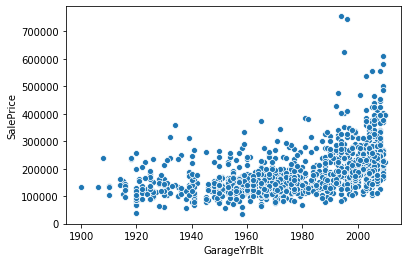

In [20]:
#relation between GarageYrBlt and SalePrice
sns.scatterplot('GarageYrBlt','SalePrice',data=housing_df)

In [21]:
#minimum value GarageYrBlt
minGarageYrBlt=min(housing_df['GarageYrBlt'])

In [22]:
#replacing no garge with minGargeYrBlt-10 as NO garage should have less impact than old garage
housing_df['GarageYrBlt']=housing_df['GarageYrBlt'].fillna(minGarageYrBlt-10)

In [23]:
#checking top 20 missing value percentage
missing_values(housing_df,20)

              % of missing values  missing_values_count
BsmtExposure             2.602740                    38
BsmtFinType2             2.602740                    38
BsmtFinType1             2.534247                    37
BsmtQual                 2.534247                    37
BsmtCond                 2.534247                    37
MasVnrType               0.547945                     8
MasVnrArea               0.547945                     8
Electrical               0.068493                     1
FireplaceQu              0.000000                     0
Fireplaces               0.000000                     0
Functional               0.000000                     0
TotRmsAbvGrd             0.000000                     0
Id                       0.000000                     0
LowQualFinSF             0.000000                     0
KitchenQual              0.000000                     0
KitchenAbvGr             0.000000                     0
BedroomAbvGr             0.000000               

In [24]:
#BsmtExposure: Refers to walkout or garden level walls
#BsmtFinType1: Rating of basement finished area
#BsmtFinType2: Rating of basement finished area (if multiple types)

In [25]:
#NA imples no basement replacing it with None
housing_df[['BsmtExposure','BsmtFinType1','BsmtFinType2']]=housing_df[['BsmtExposure','BsmtFinType1','BsmtFinType2']].replace(np.nan,'None')

In [26]:
#previewing missing values
missing_values(housing_df,20)

              % of missing values  missing_values_count
BsmtQual                 2.534247                    37
BsmtCond                 2.534247                    37
MasVnrType               0.547945                     8
MasVnrArea               0.547945                     8
Electrical               0.068493                     1
KitchenQual              0.000000                     0
FireplaceQu              0.000000                     0
Fireplaces               0.000000                     0
Functional               0.000000                     0
TotRmsAbvGrd             0.000000                     0
KitchenAbvGr             0.000000                     0
GarageYrBlt              0.000000                     0
BedroomAbvGr             0.000000                     0
HalfBath                 0.000000                     0
FullBath                 0.000000                     0
BsmtHalfBath             0.000000                     0
BsmtFullBath             0.000000               

In [27]:
#BsmtQual: Evaluates the height of the basement
#BsmtCond: Evaluates the general condition of the basement

In [28]:
#replacing missing values with None
housing_df[['BsmtQual','BsmtCond']]=housing_df[['BsmtQual','BsmtCond']].replace(np.nan,'None')

In [29]:
#checking top 20 missing value percentage
missing_values(housing_df,20)

              % of missing values  missing_values_count
MasVnrType               0.547945                     8
MasVnrArea               0.547945                     8
Electrical               0.068493                     1
KitchenQual              0.000000                     0
GarageYrBlt              0.000000                     0
GarageType               0.000000                     0
FireplaceQu              0.000000                     0
Fireplaces               0.000000                     0
Functional               0.000000                     0
TotRmsAbvGrd             0.000000                     0
Id                       0.000000                     0
GarageFinish             0.000000                     0
BedroomAbvGr             0.000000                     0
HalfBath                 0.000000                     0
FullBath                 0.000000                     0
BsmtHalfBath             0.000000                     0
BsmtFullBath             0.000000               

In [30]:
#MasVnrType: Masonry veneer type
#MasVnrArea: Masonry veneer area in square feet

In [31]:
#check the count of MasVnrType
housing_df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [32]:
#checking the spread of MasVntArea
housing_df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [33]:
#replacing missing MasVnrType with None
#replacing missing MasVnrArea with 0
housing_df['MasVnrType']=housing_df['MasVnrType'].replace(np.nan,'None')
housing_df['MasVnrArea']=housing_df['MasVnrArea'].replace(np.nan,0)

In [34]:
#checking missing value percentage
missing_values(housing_df,10)

              % of missing values  missing_values_count
Electrical               0.068493                     1
CentralAir               0.000000                     0
GarageYrBlt              0.000000                     0
GarageType               0.000000                     0
FireplaceQu              0.000000                     0
Fireplaces               0.000000                     0
Functional               0.000000                     0
TotRmsAbvGrd             0.000000                     0
KitchenQual              0.000000                     0
KitchenAbvGr             0.000000                     0


In [35]:
#check the count of Electrical
housing_df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [36]:
#replacing missing value of Electrical with its mode
mod=housing_df['Electrical'].mode()[0]
housing_df['Electrical']=housing_df['Electrical'].fillna(mod)

In [37]:
#checking missing value percentage
missing_values(housing_df,90)

               % of missing values  missing_values_count
Id                             0.0                     0
CentralAir                     0.0                     0
GarageYrBlt                    0.0                     0
GarageType                     0.0                     0
FireplaceQu                    0.0                     0
Fireplaces                     0.0                     0
Functional                     0.0                     0
TotRmsAbvGrd                   0.0                     0
KitchenQual                    0.0                     0
KitchenAbvGr                   0.0                     0
BedroomAbvGr                   0.0                     0
HalfBath                       0.0                     0
FullBath                       0.0                     0
BsmtHalfBath                   0.0                     0
BsmtFullBath                   0.0                     0
GrLivArea                      0.0                     0
LowQualFinSF                   

In [38]:
#No more missing values exist

### Outlier Analysis

In [39]:
#checking the spread of data
housing_df.describe(percentiles=[0.01,0.05,0.1,0.25,0.50,0.75,0.90,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1973.595890,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,31.408598,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1890.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
1%,15.590000,20.000000,21.000000,1680.000000,3.000000,3.000000,1899.180000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,520.000000,0.000000,0.000000,692.180000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,0.000000,1890.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,61815.970000
5%,73.950000,20.000000,35.950000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1890.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000
10%,146.900000,20.000000,49.000000,5000.000000,5.000000,5.000000,1924.900000,1950.000000,0.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,0.000000,912.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1928.000000,1.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,106475.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000

In [40]:
#LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,
#GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice

In [41]:
#function to plot box plots
def box_plot(dataframe,col,x):
    fig,ax=plt.subplots(10,4)
    sns.boxplot(col,data=dataframe,orient='v',ax=ax[x])
    plt.show()

In [42]:
#storing the values in outliers variable
outliercolumns=['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea','GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
       'SalePrice']

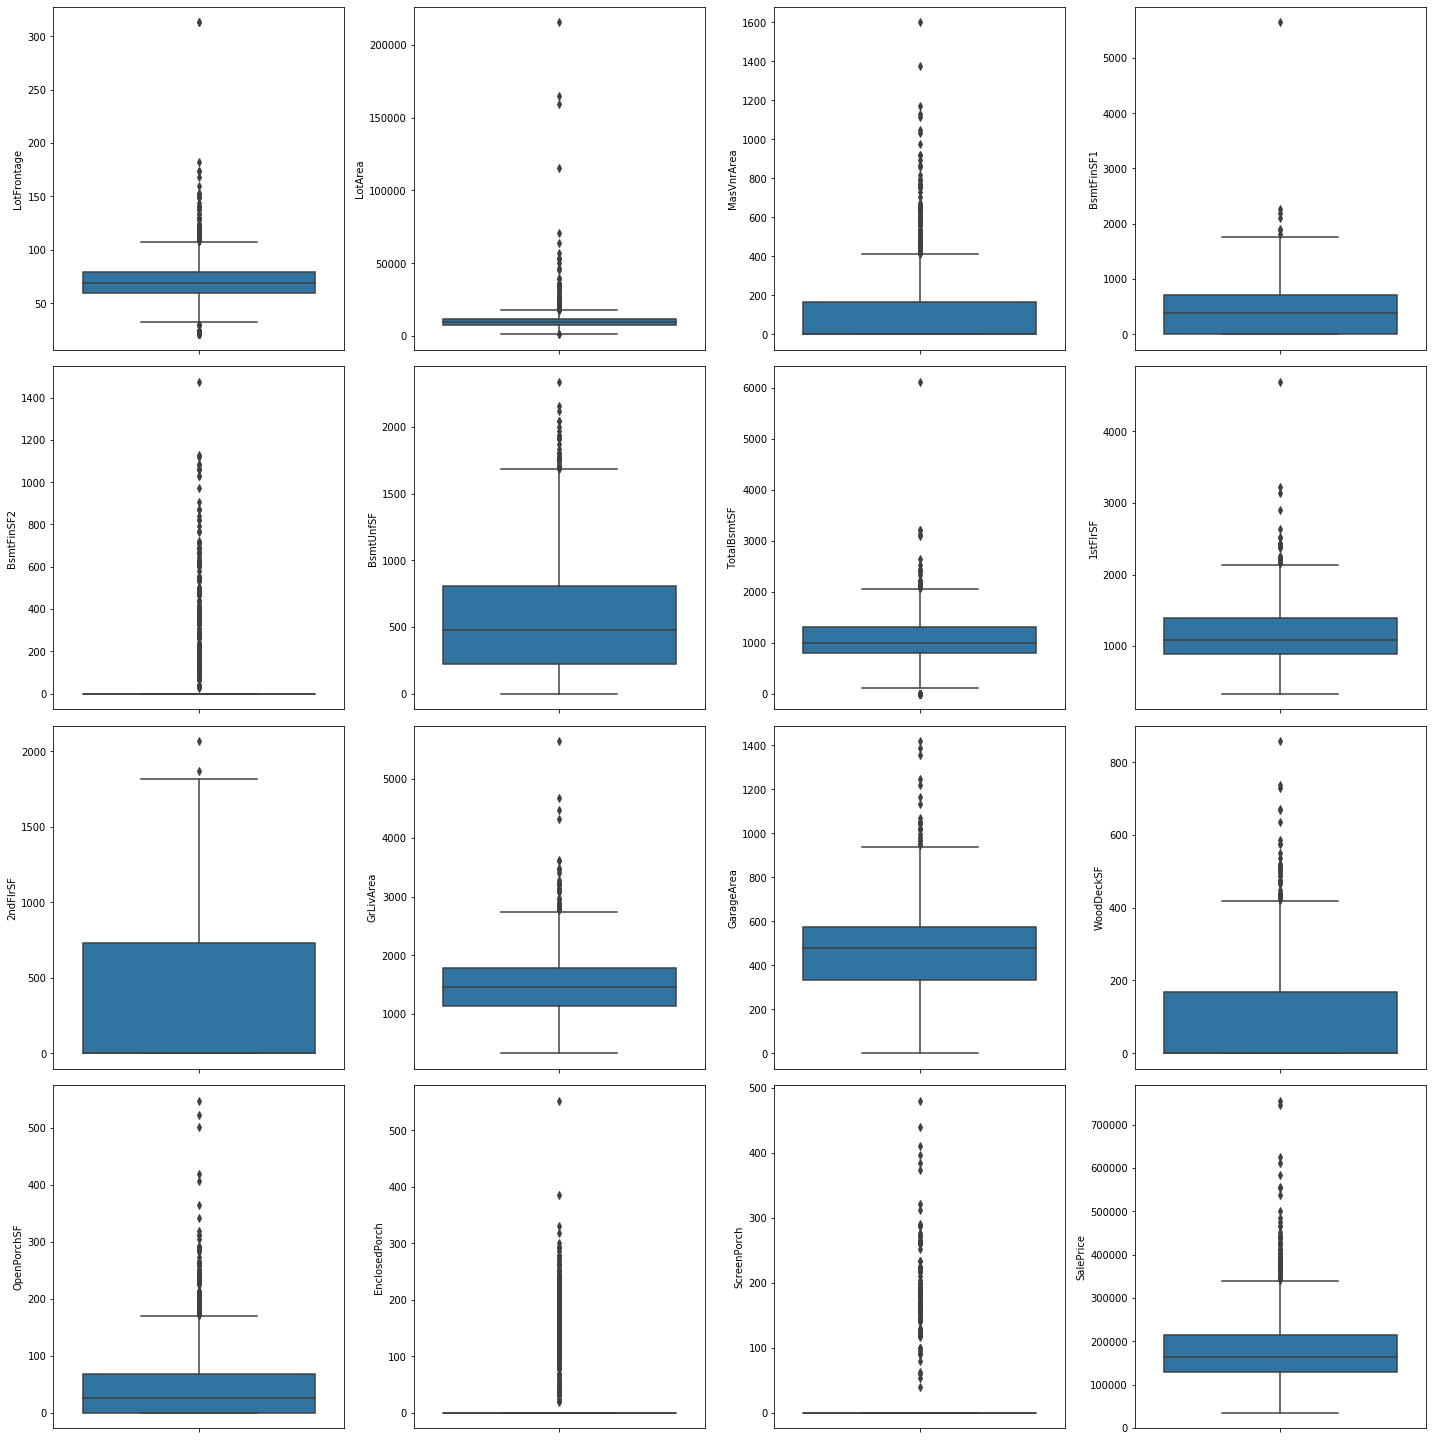

In [43]:
#checking the spread of data
i = 1
plt.figure(figsize=(20,50))
for col in outliercolumns:
    plt.subplot(10,4,i)
    sns.boxplot(x=housing_df[col],orient='v')
    i = i + 1
plt.tight_layout()
plt.show()

In [44]:
#finding the inter quartile range 
for i in outliercolumns:
    Q1 = housing_df[i].quantile(0.01)
    Q3 = housing_df[i].quantile(0.99)
    IQR = Q3 - Q1
    print(i,"IQR-",IQR)
    print(i,'lower bound', Q1 - 1.5*IQR)
    print(i,'upper bound', Q3 + 1.5*IQR,end='\n\n')

LotFrontage IQR- 116.41000000000008
LotFrontage lower bound -153.61500000000012
LotFrontage upper bound 312.0250000000002

LotArea IQR- 35887.64000000022
LotArea lower bound -52151.46000000033
LotArea upper bound 91399.10000000054

MasVnrArea IQR- 791.2800000000007
MasVnrArea lower bound -1186.920000000001
MasVnrArea upper bound 1978.2000000000016

BsmtFinSF1 IQR- 1572.41
BsmtFinSF1 lower bound -2358.6150000000002
BsmtFinSF1 upper bound 3931.0250000000005

BsmtFinSF2 IQR- 830.3800000000015
BsmtFinSF2 lower bound -1245.5700000000022
BsmtFinSF2 upper bound 2075.9500000000035

BsmtUnfSF IQR- 1797.0500000000004
BsmtUnfSF lower bound -2695.5750000000007
BsmtUnfSF upper bound 4492.625000000001

TotalBsmtSF IQR- 2155.05
TotalBsmtSF lower bound -3232.5750000000003
TotalBsmtSF upper bound 5387.625

1stFlrSF IQR- 1699.4600000000005
1stFlrSF lower bound -2029.1900000000005
1stFlrSF upper bound 4768.6500000000015

2ndFlrSF IQR- 1418.920000000001
2ndFlrSF lower bound -2128.3800000000015
2ndFlrSF up

In [45]:
#imputing the values of columns having more than 99percentile values with 99 percentile value
#imputing the values of columns having less than 1 percentile values with 1 percentile value
for i in outliercolumns:
    Q1 = housing_df[i].quantile(0.05)
    Q3 = housing_df[i].quantile(0.95)
    IQR = Q3 - Q1
    upper_bound=Q3 + 1.5*IQR
    lower_bound=Q1 - 1.5*IQR
    housing_df[i][housing_df[i]<lower_bound]=lower_bound
    housing_df[i][housing_df[i]>upper_bound]=upper_bound

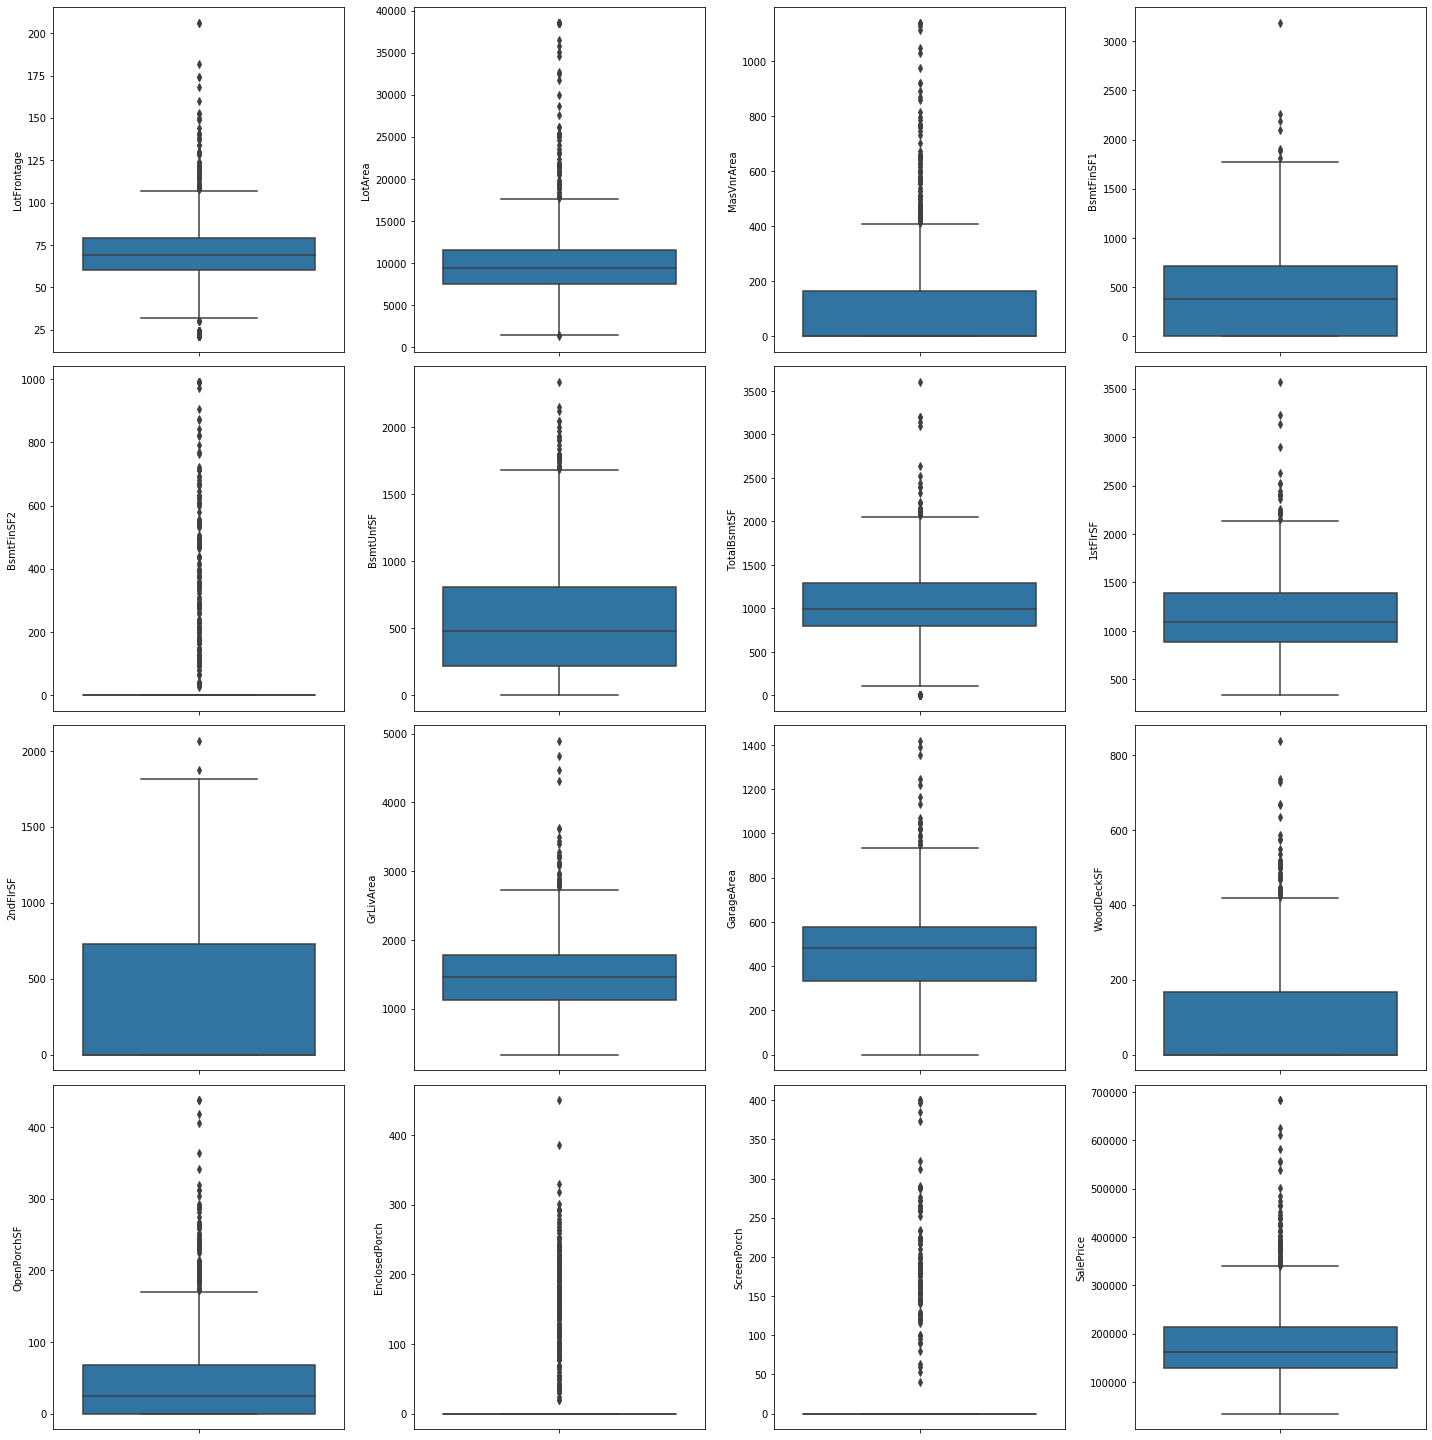

In [46]:
#box plot to check the spread of data after imputing 
i = 1
plt.figure(figsize=(20,50))
for col in outliercolumns:
    plt.subplot(10,4,i)
    sns.boxplot(x=housing_df[col],orient='v')
    i = i + 1
plt.tight_layout()
plt.show()

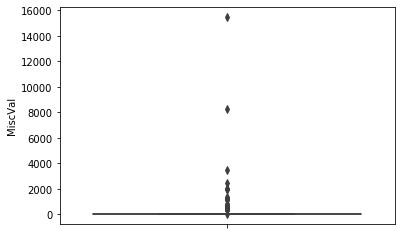

In [47]:
sns.boxplot('MiscVal',data=housing_df,orient='v')

In [48]:
# check the spread of MiscVal 
housing_df['MiscVal'].value_counts().sort_index()

0        1408
54          1
350         1
400        11
450         4
480         2
500         8
560         1
600         4
620         1
700         5
800         1
1150        1
1200        2
1300        1
1400        1
2000        4
2500        1
3500        1
8300        1
15500       1
Name: MiscVal, dtype: int64

In [49]:
#removing 99.5 percentile outliers
percentile_995=np.percentile(housing_df['MiscVal'],99.5)
housing_df['MiscVal'][housing_df['MiscVal']>percentile_995]=percentile_995

In [50]:
# check the spread of MiscVal after outlier treatment
housing_df['MiscVal'].value_counts().sort_index()

0.0       1408
54.0         1
350.0        1
400.0       11
450.0        4
480.0        2
500.0        8
560.0        1
600.0        4
620.0        1
700.0        5
800.0        1
1150.0       1
1200.0       2
1300.0       1
1400.0       1
1823.0       8
Name: MiscVal, dtype: int64

In [51]:
#checking the spread after outlier treatment
housing_df.describe(percentiles=[0.01,0.05,0.1,0.25,0.50,0.75,0.90,0.95,0.99,0.995])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.717226,10072.055394,6.099315,5.575342,1971.267808,1984.865753,102.618493,441.955479,45.712329,567.240411,1055.712705,1161.857329,346.992466,5.844521,1514.950856,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1973.595890,1.767123,472.980137,94.231164,46.482791,21.884503,3.409589,14.971918,2.758904,27.587671,6.321918,2007.815753,180829.757534
std,421.610009,42.300571,20.726673,5118.484147,1.382997,1.112799,30.202904,20.645407,177.325571,441.177568,155.671744,441.866955,423.562799,380.630690,436.528436,48.623081,521.802834,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,31.408598,0.747315,213.804841,125.258472,65.076262,60.570492,29.317331,55.088401,40.177307,173.090625,2.703626,1.328095,78822.799556
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1890.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
1%,15.590000,20.000000,21.000000,1680.000000,3.000000,3.000000,1899.180000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,520.000000,0.000000,0.000000,692.180000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,0.000000,1890.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,61815.970000
5%,73.950000,20.000000,35.950000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1890.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000
10%,146.900000,20.000000,49.000000,5000.000000,5.000000,5.000000,1924.900000,1950.000000,0.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,0.000000,912.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1928.000000,1.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,106475.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000

In [52]:
#checing the datatypes of the coulmns
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null float64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 n

In [53]:
# Univariate Analysis

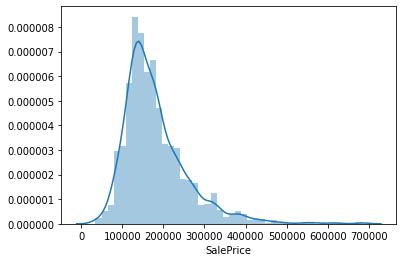

In [54]:
#checking the spread of saleprice
sns.distplot(housing_df['SalePrice'])

In [55]:
#derived variables

In [56]:
#created a variable by calculating the difference between YrSold and and YearBuilt (age of house at the time of selling)
#created a variable by calculating the number of years before the house was renewed
housing_df['Age_of_dwelling']=housing_df['YrSold']-housing_df['YearBuilt']
housing_df['No_of_Years_Last_Renewed']=housing_df['YrSold']-housing_df['YearRemodAdd']

In [57]:
#droping YrSold, YearBuilt, YearRemodAdd and MoSold
housing_df.drop(['YrSold','YearBuilt','YearRemodAdd','MoSold'],axis=1,inplace=True)

In [58]:
#checking the categorical variables
housing_df.select_dtypes(exclude='object').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'Age_of_dwelling', 'No_of_Years_Last_Renewed'],
      dtype='object')

In [59]:
## Converting numerical to categorical variables as MSSubClass(different classes) , OverallQual and OverallQual(rating)
housing_df[['MSSubClass','OverallQual','OverallCond']]=housing_df[['MSSubClass','OverallQual','OverallCond']].astype(object)

In [60]:
#storing categorical variables in cat_variable
cat_variables=housing_df.select_dtypes(include='object').columns

In [61]:
#preview the categorical variables
cat_variables

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [62]:
##storing numerical variables in num_variables
num_variables=housing_df.select_dtypes(exclude='object').columns

In [63]:
#preview the numerical variables
num_variables

Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice', 'Age_of_dwelling', 'No_of_Years_Last_Renewed'],
      dtype='object')

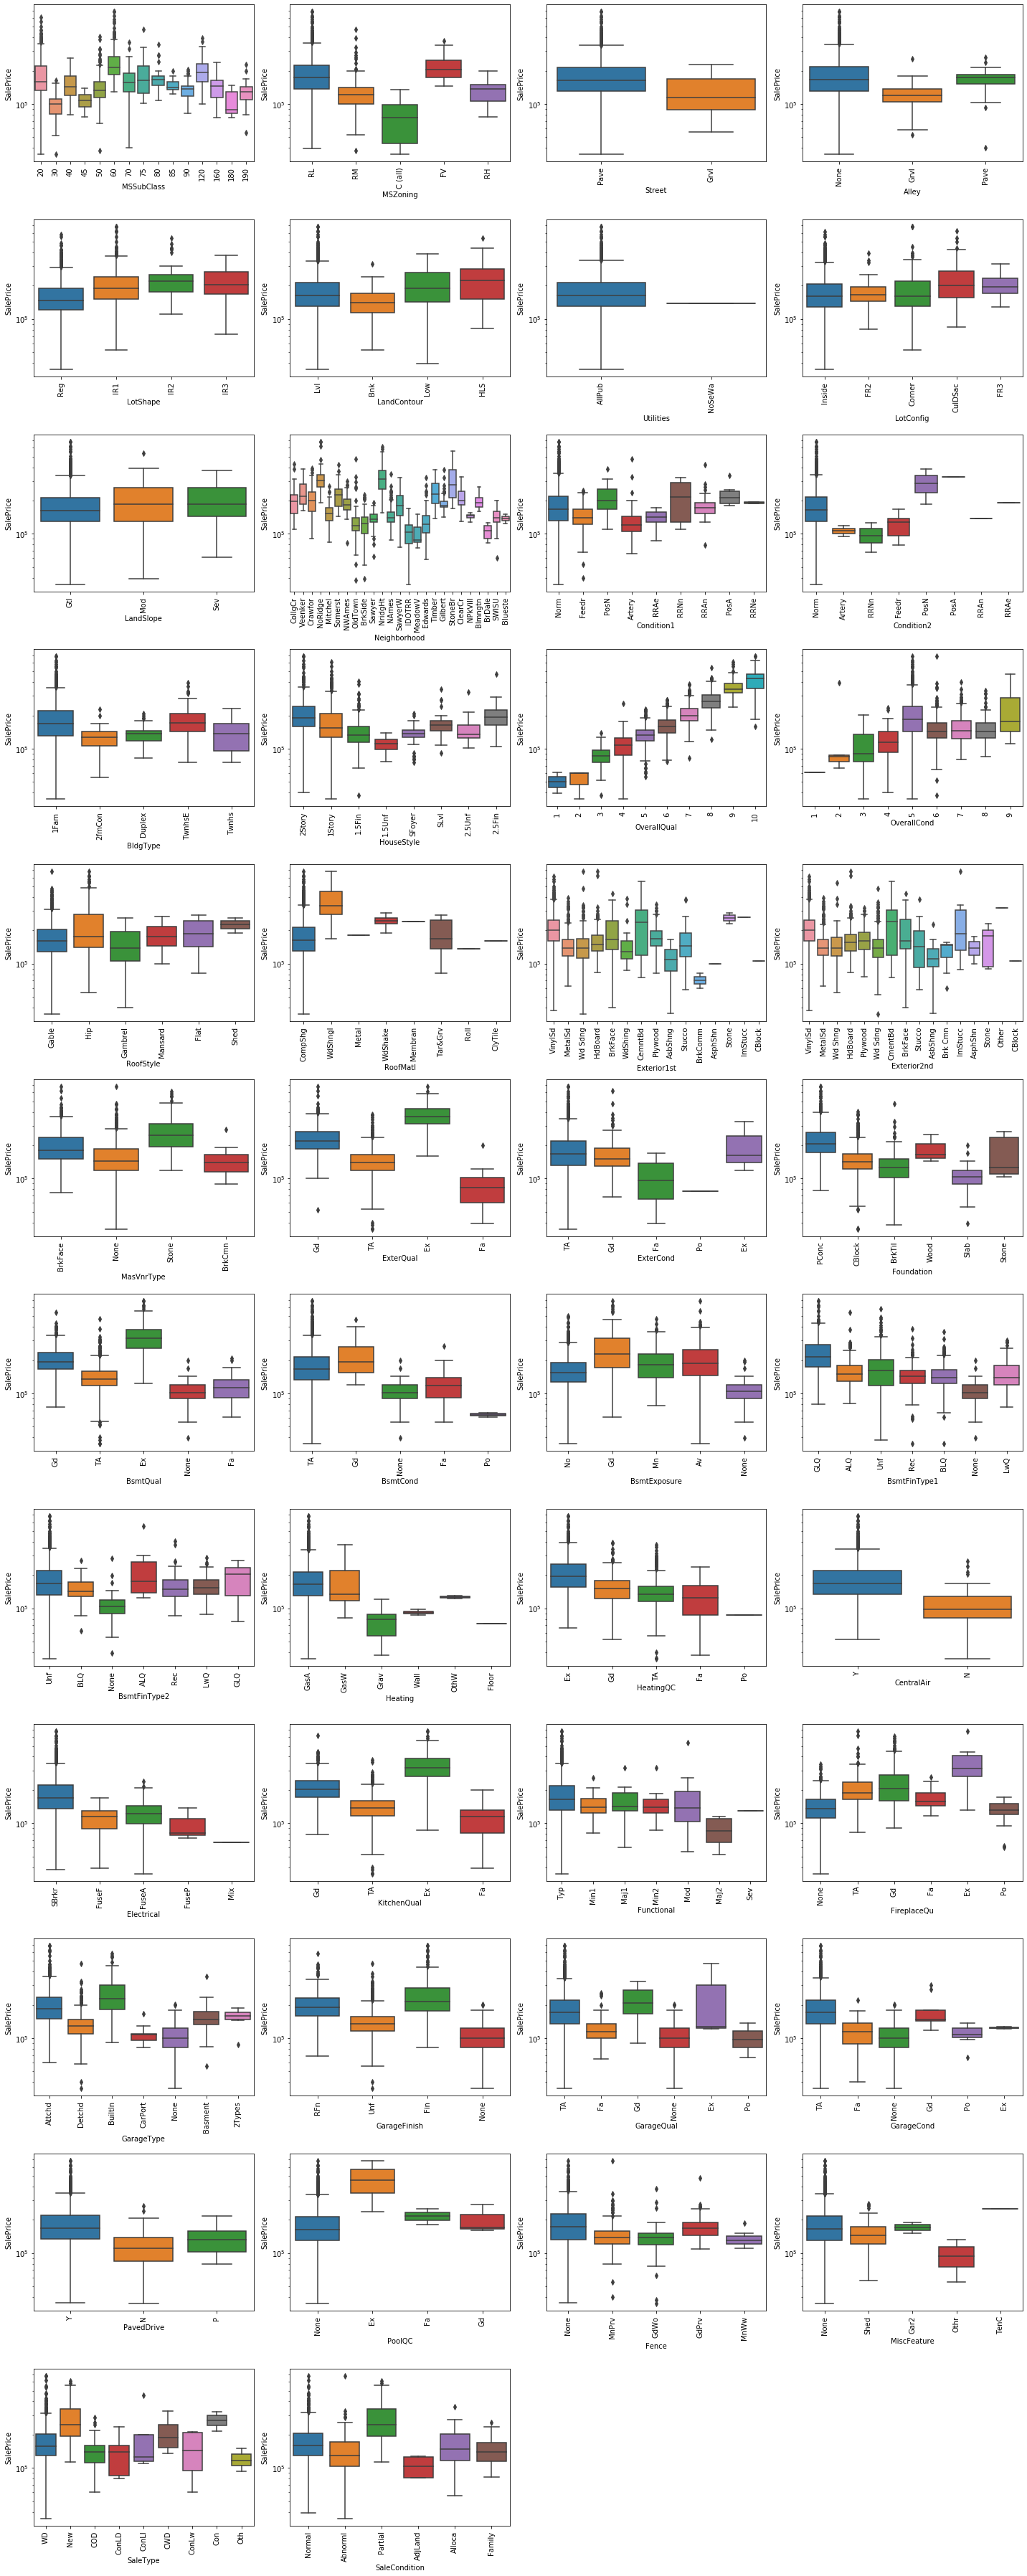

In [64]:
#box plot of cat variables
i = 1
plt.figure(figsize=(20,50))
for col in cat_variables:
    plt.subplot(12,4,i)
    fig=sns.boxplot(x=housing_df[col],y=housing_df['SalePrice'])
    fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
    i = i + 1
    plt.yscale('log')
plt.tight_layout()
plt.show()

In [65]:
#Checing the correlation of variables with SalePrice using pair plot

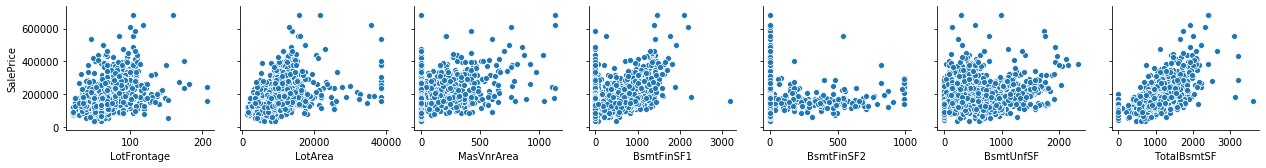

In [66]:
sns.pairplot(x_vars=num_variables[1:8],y_vars='SalePrice',data=housing_df)

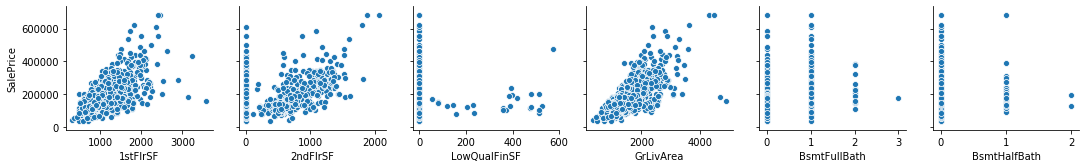

In [67]:
sns.pairplot(x_vars=num_variables[8:14],y_vars='SalePrice',data=housing_df)

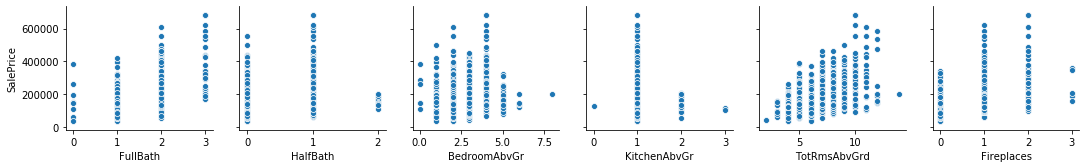

In [68]:
sns.pairplot(x_vars=num_variables[14:20],y_vars='SalePrice',data=housing_df)

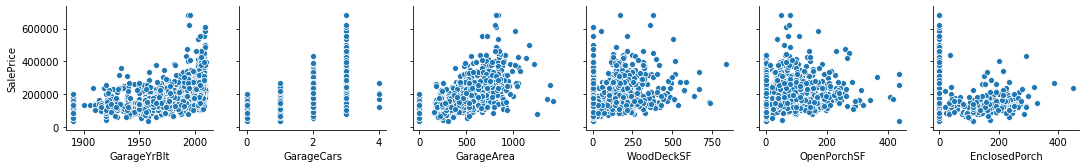

In [69]:
sns.pairplot(x_vars=num_variables[20:26],y_vars='SalePrice',data=housing_df)

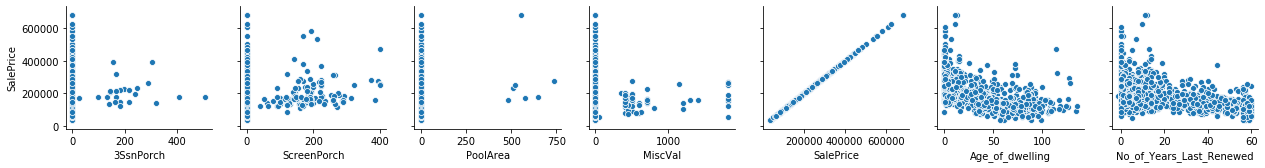

In [70]:
sns.pairplot(x_vars=num_variables[26:33],y_vars='SalePrice',data=housing_df)

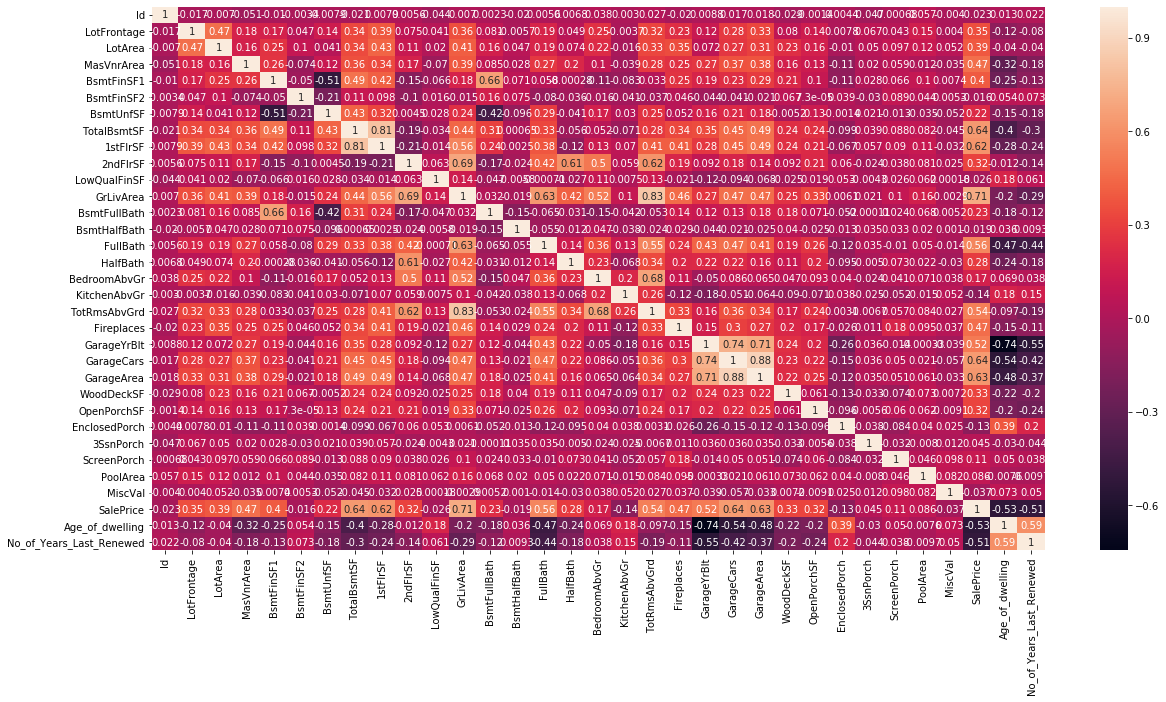

In [71]:
#checking the correlation between the varaibles
plt.figure(figsize=(20,10))
sns.heatmap(housing_df.corr(),annot=True)

In [72]:
#finding the count of categories of cat_variables
for i in range(len(cat_variables)):
     print(housing_df[cat_variables[i]].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel 

In [73]:
# RoofMatl Condition2 Utilities has data imbalance so dropping them

In [74]:
housing_df.drop(['RoofMatl','Condition2','Utilities'],axis=1,inplace=True)

### Data Preparation

In [75]:
##storing categorical variables in cat_variables
cat_variables=housing_df.select_dtypes(include='object').columns

In [76]:
##storing numerical variables in num_variables
num_variables=housing_df.select_dtypes(exclude='object').columns

In [77]:
#preview categorical variable
cat_variables

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [78]:
#grouping the ordinal variables to apply label encoding overthem
ordinal_cat_varaibles=['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure'
            ,'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']

In [79]:
#nominal variables
nominal_cat_variable=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType','Foundation',
       'Heating', 'CentralAir', 'Electrical',
       'Functional', 'GarageType', 'GarageFinish',
       'PavedDrive','Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

In [80]:
#Checking the length of cat variable
len(cat_variables)

43

In [81]:
#checking the sum of nominal and ordinal equal cat variable
len(nominal_cat_variable)+len(ordinal_cat_varaibles)

43

In [82]:
# created mapping dictionary for different types of ordinal variables

In [83]:
rating_mapping={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0}

In [84]:
Bsmt_rating_mapping={'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0}

In [85]:
Bsmt_exposure_mapping={'Gd':4,'Av':3,'Mn':2,'No':1,'None':0}

#### Label Encoding

In [86]:
#segregated the different types of ordinal variables

In [87]:
rating=['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu',
        'GarageQual','GarageCond','PoolQC']

In [88]:
Bsmt_exposure=['BsmtExposure']

In [89]:
Bsmt_rating=['BsmtFinType1','BsmtFinType2']

In [90]:
#encoding the ordinal variables
housing_df[rating]=housing_df[rating].apply(lambda x:x.map(rating_mapping))
housing_df[Bsmt_exposure]=housing_df[Bsmt_exposure].apply(lambda x:x.map(Bsmt_exposure_mapping))
housing_df[Bsmt_rating]=housing_df[Bsmt_rating].apply(lambda x:x.map(Bsmt_rating_mapping))

In [91]:
#creating dummies for nominal variables and storing in temp dataframe
temp=pd.get_dummies(housing_df[nominal_cat_variable],drop_first=True)

In [92]:
#dropping original nominal variables
housing_df.drop(nominal_cat_variable,axis=1,inplace=True)

In [93]:
#concatinated the dummies dataframe with original variables
housing_encoded=pd.concat([housing_df,temp],axis=1)

In [94]:
#previewing the dataframe
housing_encoded.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,...,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450.0,7,5,196.0,4,3,4,3,1,6,706,1,0.0,150,856.0,5,856.0,854,0,1710.0,1,0,2,1,3,1,4,8,0,0,2003.0,2,548,3,3,0.0,61.0,0.0,...,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600.0,6,8,0.0,3,3,4,3,4,5,978,1,0.0,284,1262.0,5,1262.0,0,0,1262.0,0,1,2,0,3,1,3,6,1,3,1976.0,2,460,3,3,298.0,0.0,0.0,...,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250.0,7,5,162.0,4,3,4,3,2,6,486,1,0.0,434,920.0,5,920.0,866,0,1786.0,1,0,2,1,3,1,4,6,1,3,2001.0,2,608,3,3,0.0,42.0,0.0,...,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550.0,7,5,0.0,3,3,3,4,1,5,216,1,0.0,540,756.0,4,961.0,756,0,1717.0,1,0,1,0,3,1,4,7,1,4,1998.0,3,642,3,3,0.0,35.0,272.0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260.0,8,5,350.0,4,3,4,3,3,6,655,1,0.0,490,1145.0,5,1145.0,1053,0,2198.0,1,0,2,1,4,1,4,9,1,3,2000.0,3,836,3,3,192.0,84.0,0.0,...,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Train test Split

In [95]:
#importing train_test split module
from sklearn.model_selection import train_test_split

In [96]:
#creating dependent and independent variables
y=housing_encoded['SalePrice']
X=housing_encoded.drop(['Id','SalePrice'],axis=1)

In [97]:
#spliting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [98]:
#preview the shape
X_train.shape

(1022, 212)

In [99]:
#scalling the data to remove skewness and reduce the implications of varing magnitudes

In [100]:
#import StandardScaler
from sklearn.preprocessing import StandardScaler

In [101]:
#instantiate StandardScaler
scaler=StandardScaler()

In [102]:
#scale X_training data using fit and transform
X_scaled_train_df=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)

In [103]:
#scale X_test data using transform
X_scaled_test_df=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [104]:
#instantiate StandardScaler
scaler_test=StandardScaler()

In [105]:
#scale y_train data using fit and transform
y_scaled_train_df=pd.DataFrame(scaler_test.fit_transform(y_train.values.reshape(-1,1)),columns=['SalePrice'])['SalePrice']

In [106]:
#scale y_test data using transform
y_scaled_test_df=pd.DataFrame(scaler_test.transform(y_test.values.reshape(-1,1)),columns=['SalePrice'])['SalePrice']

In [107]:
#preview the transformed the data
X_scaled_train_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,...,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.475065,0.048168,0.636031,0.392266,1.072458,-0.685209,-0.223446,-0.555672,0.119757,-0.589840,-1.214801,-1.012065,-0.269896,-0.283412,1.643785,0.579254,-0.150315,1.347726,-0.802294,-0.120313,0.292070,-0.814295,-0.247663,0.767840,-0.758517,0.135175,-0.212318,-0.763248,0.279234,0.594240,1.208878,-0.127744,0.296063,0.253813,0.245353,0.252691,0.003575,-0.725985,-0.349188,-0.119317,...,0.0,0.303118,-0.062684,-0.155074,-0.158352,-0.113508,-0.031296,0.28344,0.831897,-0.117851,-0.258468,-0.083045,-0.606745,-0.236189,-0.236189,-0.632456,1.187593,-0.148324,0.303118,-0.204436,2.850439,-0.088823,-2.014797,0.201825,-0.031296,-0.193813,-0.031296,-0.062684,-0.044281,-0.083045,-0.031296,-0.054259,-0.299253,-0.031296,0.380075,-0.062684,-0.070117,-0.130059,0.4608,-0.301189
1,-1.643685,-1.247640,-0.823057,-0.508624,-0.144643,-0.685209,-0.223446,0.577855,0.119757,2.209619,1.154524,0.235427,-0.269896,-0.283412,-1.281383,-1.198302,-0.150315,-0.253705,-0.802294,-0.120313,-0.868674,1.112115,-0.247663,-1.069941,-0.758517,-1.098297,-0.212318,-0.763248,-0.948194,-0.943262,-1.000283,0.992484,0.296063,0.229814,0.245353,0.252691,-0.741566,-0.313952,-0.349188,-0.119317,...,0.0,0.303118,-0.062684,-0.155074,-0.158352,-0.113508,-0.031296,0.28344,-1.202072,8.485281,-0.258468,-0.083045,-0.606745,-0.236189,-0.236189,-0.632456,-0.842039,-0.148324,0.303118,-0.204436,-0.350823,-0.088823,0.496328,0.201825,-0.031296,-0.193813,-0.031296,-0.062684,-0.044281,-0.083045,-0.031296,-0.054259,-0.299253,-0.031296,0.380075,-0.062684,-0.070117,-0.130059,0.4608,-0.301189
2,0.098398,-0.290958,0.636031,-0.508624,-0.612759,-0.685209,-0.223446,0.577855,0.119757,0.343313,1.154524,-0.957330,-0.269896,-0.283412,0.360659,-0.707537,0.887671,-1.062297,0.973582,-0.120313,0.035184,-0.814295,-0.247663,0.767840,1.265515,0.135175,-0.212318,0.751392,0.279234,-0.943262,-1.000283,1.120510,0.296063,0.656997,0.245353,0.252691,0.543422,-0.063790,-0.349188,-0.119317,...,0.0,0.303118,-0.062684,-0.155074,-0.158352,-0.113508,-0.031296,0.28344,0.831897,-0.117851,-0.258468,-0.083045,-0.606745,-0.236189,-0.236189,-0.632456,1.187593,-0.148324,0.303118,-0.204436,-0.350823,-0.088823,0.496328,0.201825,-0.031296,-0.193813,-0.031296,-0.062684,22.583180,-0.083045,-0.031296,-0.054259,-0.299253,-0.031296,-2.631061,-0.062684,-0.070117,-0.130059,0.4608,-0.301189
3,0.663398,0.292878,2.095118,-0.508624,1.154378,2.816208,-0.223446,1.711383,1.919633,-0.589840,-1.214801,-1.012065,-0.269896,-0.283412,2.991965,1.990497,0.887671,1.933168,-0.802294,-0.120313,0.716407,-0.814295,-0.247663,0.767840,-0.758517,0.135175,-0.212318,2.266031,0.892948,0.594240,1.208878,1.024490,1.665189,1.492165,0.245353,0.252691,-0.741566,2.084665,-0.349188,-0.119317,...,0.0,0.303118,-0.062684,-0.155074,-0.158352,-0.113508,-0.031296,0.28344,0.831897,-0.117851,-0.258468,-0.083045,-0.606745,-0.236189,-0.236189,-0.632456,-0.842039,-0.148324,0.303118,-0.204436,-0.350823,-0.088823,0

In [108]:
#preview the scaled y data
y_scaled_train_df.head()

0   -0.093986
1   -0.469812
2    0.439946
3    1.798103
4    0.398476
Name: SalePrice, dtype: float64

In [109]:
## Model building

In [110]:
#importing the required libraries
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [111]:
# list of different alphas to tune
params = {'alpha': [ 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 20, 50, 100,1000,10000]}
#ridge model
ridge = Ridge()
# cross validation
folds = KFold(n_splits=5,shuffle=True,random_state=42)
#GridSearch to find the best alpha
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
#fit the model
ridge_model_cv.fit(X_scaled_train_df, y_scaled_train_df) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0,
                                   20, 50, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [112]:
#storing the cv results
ridge_cv_results=pd.DataFrame(ridge_model_cv.cv_results_)

In [113]:
#previewing the data frame
ridge_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004990,1.264193e-03,0.001193,4.001551e-04,0.001,{'alpha': 0.001},-0.268719,-0.386564,-0.291671,-0.296319,-0.336780,-0.316033,0.041580,12,-0.185806,-0.190230,-0.192736,-0.180913,-0.181129,-0.186163,0.004749
1,0.004791,7.467056e-04,0.001195,3.996392e-04,0.01,{'alpha': 0.01},-0.269854,-0.333281,-0.291403,-0.296864,-0.336555,-0.305584,0.025627,8,-0.186624,-0.193578,-0.192696,-0.181108,-0.181154,-0.187032,0.005380
2,0.003990,4.623108e-07,0.000399,4.886361e-04,0.05,{'alpha': 0.05},-0.274419,-0.291914,-0.290833,-0.303047,-0.335902,-0.299192,0.020485,7,-0.190105,-0.200835,-0.192611,-0.183273,-0.181254,-0.189616,0.007003
3,0.003790,3.991843e-04,0.000997,6.975526e-07,0.1,{'alpha': 0.1},-0.279091,-0.318184,-0.290461,-0.309327,-0.335306,-0.306459,0.019916,9,-0.193082,-0.204226,-0.192560,-0.186138,-0.181369,-0.191475,0.007707
4,0.003790,3.990651e-04,0.000997,3.693565e-07,0.5,{'alpha': 0.5},-0.290576,-0.322560,-0.288971,-0.322158,-0.331754,-0.311195,0.017836,11,-0.200596,-0.209770,-0.192473,-0.193266,-0.182212,-0.195664,0.009167
5,0.003591,4.877796e-04,0.000598,4.879550e-04,1,{'alpha': 1.0},-0.293165,-0.310272,-0.287534,-0.322689,-0.328927,-0.308504,0.016094,10,-0.202388,-0.211884,-0.192463,-0.195055,-0.183174,-0.196993,0.009655
6,0.004189,9.769509e-04,0.000997,4.909339e-07,5,{'alpha': 5.0},-0.292145,-0.283787,-0.279743,-0.313246,-0.319272,-0.297620,0.015827,6,-0.203718,-0.214788,-0.192764,-0.196786,-0.187744,-0.199160,0.009401
7,0.004990,4.918593e-06,0.000794,3.972073e-04,10,{'alpha': 10.0},-0.289190,-0.274502,-0.274233,-0.306822,-0.313858,-0.291702,0.016283,5,-0.203437,-0.214755,-0.192803,-0.197006,-0.190506,-0.199701,0.008717
8,0.004788,7.469013e-04,0.000997,1.018246e-06,20,{'alpha': 20},-0.284153,-0.265241,-0.267300,-0.297573,-0.308114,-0.284457,0.016700,4,-0.202653,-0.214165,-0.192648,-0.196960,-0.192837,-0.199853,0.008027
9,0.005187,3.990174e-04,0.001197,3.988267e-04,50,{'alpha': 50},-0.274720,-0.251959,-0.257166,-0.281880,-0.299255,-0.272977,0.017111,3,-0.201006,-0.212748,-0.192646,-0.197194,-0.194559,-0.199630,0.007133


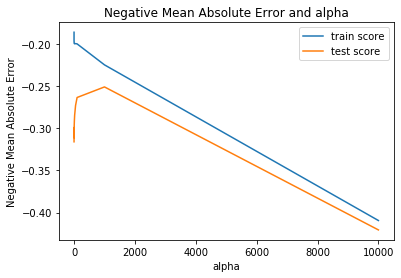

In [114]:
# plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [115]:
#finding the best alpha values
ridge_model_cv.best_params_

{'alpha': 1000}

In [116]:
#building the model with tuned hyperparameter
ridge=Ridge(alpha=1000)
ridge.fit(X_scaled_train_df,y_scaled_train_df)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [117]:
#predictions on training data
predict_train=ridge.predict(X_scaled_train_df)

In [118]:
#model evaluations

In [119]:
#storing the residues
residue=y_scaled_train_df.values-predict_train.T

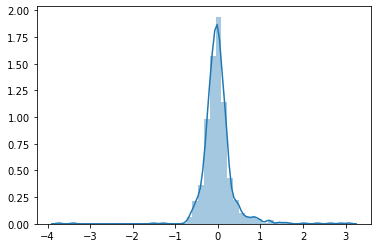

In [120]:
#checing the distribution of error terms
sns.distplot(residue)

In [121]:
#importing the model evaluation metrics
from sklearn.metrics import mean_squared_error,r2_score

In [122]:
#r2 score on train data
r2_score(y_scaled_train_df,predict_train)

0.8547313740882811

In [123]:
#prediction on test data
predict_test=ridge.predict(X_scaled_test_df)

In [124]:
#r2 score on test data
r2_score(y_scaled_test_df,predict_test)

0.8526211843996291

In [125]:
#mean squared error on train data
mean_squared_error(y_scaled_train_df,predict_train)

0.14526862591171882

In [126]:
#mean squared error on test data
mean_squared_error(y_scaled_test_df,predict_test)

0.1683501196561389

In [127]:
residue=y_scaled_train_df.values-predict_train.T

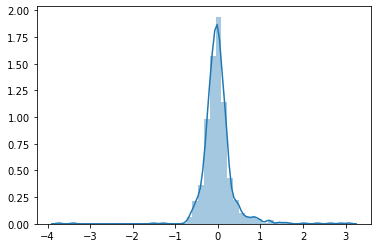

In [128]:
#checing the distribution of error terms
sns.distplot(residue)

In [129]:
#storing the coefficients of model
ridge_coefficients_df=pd.DataFrame(ridge.coef_,index=X_scaled_train_df.columns,columns=['Coefficients'])

In [130]:
#creating absoulte values of coefficients
ridge_coefficients_df['Abs_Coefficients']=ridge_coefficients_df.apply(abs).round(4)

In [131]:
#previewing the coefficients
ridge_coefficients_df.sort_values(by='Abs_Coefficients',ascending=False)

,Coefficients,Abs_Coefficients
OverallQual,0.085185,0.0852
GrLivArea,0.073105,0.0731
1stFlrSF,0.058196,0.0582
Neighborhood_NridgHt,0.055543,0.0555
TotalBsmtSF,0.054262,0.0543
KitchenQual,0.053557,0.0536
TotRmsAbvGrd,0.053588,0.0536
Neighborhood_NoRidge,0.053157,0.0532
GarageCars,0.051224,0.0512
ExterQual,0.048624,0.0486


In [132]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 20, 50, 100,1000]}
#lasso model
lasso = Lasso()
# cross validation
folds = 5
#GridSearch to find the best alpha
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)   
#fit the model
lasso_model_cv.fit(X_scaled_train_df,y_scaled_train_df) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0,
                                   5.0, 10.0, 20, 50, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [133]:
#storing the cv results
lasso_cv_result=pd.DataFrame(lasso_model_cv.cv_results_)

In [134]:
#preview the data frame
lasso_cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.079388,0.008792,0.000998,2.611745e-07,0.0001,{'alpha': 0.0001},-0.259681,-0.316360,-0.269706,-0.292612,-0.555729,-0.338718,0.110130,5,-0.201604,-0.170593,-0.204509,-0.208257,-0.196122,-0.196217,0.013412
1,0.036502,0.022520,0.000998,3.814697e-07,0.001,{'alpha': 0.001},-0.254065,-0.303186,-0.261053,-0.282303,-0.379437,-0.295975,0.045099,4,-0.205243,-0.172471,-0.209613,-0.211627,-0.207229,-0.201237,0.014543
2,0.010570,0.001018,0.000998,3.015783e-07,0.01,{'alpha': 0.01},-0.254038,-0.293627,-0.230689,-0.259848,-0.217363,-0.251157,0.026270,1,-0.217316,-0.189505,-0.216650,-0.219983,-0.220510,-0.212793,0.011738
3,0.005785,0.001163,0.000798,3.991127e-04,0.05,{'alpha': 0.05},-0.278258,-0.333520,-0.243832,-0.269057,-0.226231,-0.270249,0.036636,2,-0.250536,-0.233355,-0.257025,-0.256353,-0.259437,-0.251341,0.009456
4,0.004787,0.000399,0.000798,3.988982e-04,0.1,{'alpha': 0.1},-0.299115,-0.352017,-0.276779,-0.284211,-0.250611,-0.292611,0.033654,3,-0.284089,-0.255582,-0.286911,-0.288450,-0.290574,-0.281121,0.012944
5,0.003990,0.000002,0.000798,3.990651e-04,0.5,{'alpha': 0.5},-0.562332,-0.566398,-0.594433,-0.536860,-0.517205,-0.555463,0.026416,6,-0.564971,-0.540478,-0.556182,-0.554057,-0.550197,-0.553177,0.007988
6,0.003790,0.000399,0.000798,3.990890e-04,1,{'alpha': 1.0},-0.735068,-0.737733,-0.787832,-0.717539,-0.692006,-0.734040,0.031426,7,-0.727614,-0.731474,-0.724409,-0.740020,-0.742901,-0.733283,0.007100
7,0.003591,0.000489,0.000798,3.990415e-04,5,{'alpha': 5.0},-0.735068,-0.737733,-0.787832,-0.717539,-0.692006,-0.734040,0.031426,7,-0.727614,-0.731474,-0.724409,-0.740020,-0.742901,-0.733283,0.007100
8,0.003790,0.000399,0.000798,3.989460e-04,10,{'alpha': 10.0},-0.735068,-0.737733,-0.787832,-0.717539,-0.692006,-0.734040,0.031426,7,-0.727614,-0.731474,-0.724409,-0.740020,-0.742901,-0.733283,0.007100
9,0.003590,0.000488,0.000798,3.990414e-04,20,{'alpha': 20},-0.735068,-0.737733,-0.787832,-0.717539,-0.692006,-0.734040,0.031426,7,-0.727614,-0.731474,-0.724409,-0.740020,-0.742901,-0.733283,0.007100


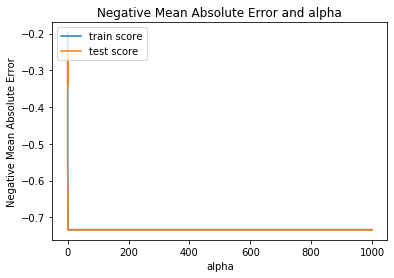

In [135]:
# plotting mean test and train scoes with alpha 
lasso_cv_result['param_alpha'] = lasso_cv_result['param_alpha'].astype('int32')
# plotting
plt.plot(lasso_cv_result['param_alpha'], lasso_cv_result['mean_train_score'])
plt.plot(lasso_cv_result['param_alpha'], lasso_cv_result['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [136]:
#finding the best alpha values
lasso_model_cv.best_params_

{'alpha': 0.01}

In [137]:
#building the model with tuned hyperparameter
lasso=Lasso(alpha=0.01)
lasso.fit(X_scaled_train_df,y_scaled_train_df)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [138]:
#predictions on training data
predict_train=lasso.predict(X_scaled_train_df)

In [139]:
#model evaluations

In [140]:
#r2 score of train data
r2_score(y_scaled_train_df,predict_train)

0.8762804692286061

In [141]:
#mean square error of train data
mean_squared_error(y_scaled_train_df,predict_train)

0.1237195307713939

In [142]:
#calculate the residue value
residue=y_scaled_train_df-predict_train

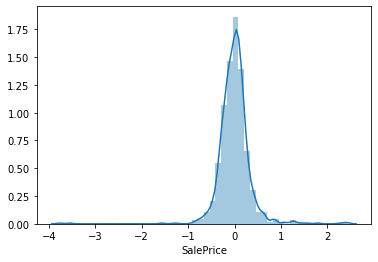

In [143]:
#checking the distribution of error terms
sns.distplot(residue)

In [144]:
#prediction on test data
predict_test=lasso.predict(X_scaled_test_df)

In [145]:
#r2 score on test data
r2_score(y_scaled_test_df,predict_test)

0.8792781426087143

In [146]:
#mean square error on test dara
mean_squared_error(y_scaled_test_df,predict_test)

0.13790000315949844

In [147]:
#calculating the residue
residue=y_scaled_test_df-predict_test

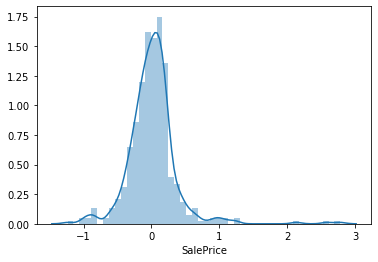

In [148]:
#check the distribution of plot
sns.distplot(residue)

In [149]:
#storing the coefficients of model
lasso_coefficients_df=pd.DataFrame(lasso.coef_,index=X_scaled_train_df.columns,columns=['Coefficients']).round(4)

In [150]:
#creating absoulte values of coefficients
lasso_coefficients_df['Abs_Coefficients']=lasso_coefficients_df.apply(abs).round(4)

In [151]:
#stored the non zero coefficients and sorted them
lasso_coefficients_df=lasso_coefficients_df[lasso_coefficients_df['Coefficients']!=0].sort_values(by='Abs_Coefficients',ascending=False)

In [152]:
#previewing the coefficients
lasso_coefficients_df

,Coefficients,Abs_Coefficients
GrLivArea,0.2476,0.2476
OverallQual,0.1918,0.1918
Neighborhood_NridgHt,0.1198,0.1198
GarageCars,0.0971,0.0971
Neighborhood_NoRidge,0.0868,0.0868
Neighborhood_StoneBr,0.0832,0.0832
BsmtFinSF1,0.0741,0.0741
KitchenQual,0.0597,0.0597
BsmtExposure,0.0567,0.0567
TotRmsAbvGrd,0.0539,0.0539


## important features

In [153]:
#Since the lasso regression worked as both regularizer and feature selector and provided good r2 score
#choosing important parameters from lasso model coefficients

In [154]:
#storing the coefficients of model
lasso_coefficients_df=pd.DataFrame(lasso.coef_,index=X_scaled_train_df.columns,columns=['Coefficients']).round(4)

In [155]:
#creating columns with absolute values
lasso_coefficients_df['Abs_Coefficients']=lasso_coefficients_df.apply(abs).round(4)

In [156]:
#storing non zero coefficients into dataframe
important_features=lasso_coefficients_df[lasso_coefficients_df['Coefficients']!=0].sort_values(by='Abs_Coefficients',ascending=False)

In [157]:
#checking the shape
important_features.shape

(93, 2)

In [158]:
#previewing top 10 features
important_features.head(10)

,Coefficients,Abs_Coefficients
GrLivArea,0.2476,0.2476
OverallQual,0.1918,0.1918
Neighborhood_NridgHt,0.1198,0.1198
GarageCars,0.0971,0.0971
Neighborhood_NoRidge,0.0868,0.0868
Neighborhood_StoneBr,0.0832,0.0832
BsmtFinSF1,0.0741,0.0741
KitchenQual,0.0597,0.0597
BsmtExposure,0.0567,0.0567
TotRmsAbvGrd,0.0539,0.0539


### Subjective question 1

In [159]:
#on doubling the alpha what are the important features of ridge and lasso

In [160]:
ridge=Ridge(alpha=2000)
ridge.fit(X_scaled_train_df,y_scaled_train_df)

Ridge(alpha=2000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [161]:
#predictions on training data
predict_train=ridge.predict(X_scaled_train_df)

#r2 score of train data
print("r2 score error: ",r2_score(y_scaled_train_df,predict_train))

#mean square error of train data
print("mean square error: ",mean_squared_error(y_scaled_train_df,predict_train))

r2 score error:  0.8250105180516398
mean square error:  0.17498948194836017


In [162]:
ridge_coefficients_df_2000=pd.DataFrame(ridge.coef_,columns=['Coefficients'],index=X_scaled_train_df.columns)

In [163]:
ridge_coefficients_df_2000['Abs_Coefficients']=ridge_coefficients_df_2000.apply(abs).round(4)

In [164]:
ridge_coefficients_df_2000.sort_values(by='Abs_Coefficients',ascending=False,inplace=True)

In [165]:
ridge_coefficients_df_2000

,Coefficients,Abs_Coefficients
OverallQual,0.069001,0.0690
GrLivArea,0.062568,0.0626
1stFlrSF,0.051077,0.0511
KitchenQual,0.048175,0.0482
TotalBsmtSF,0.047588,0.0476
TotRmsAbvGrd,0.046070,0.0461
ExterQual,0.045263,0.0453
GarageCars,0.044192,0.0442
Neighborhood_NridgHt,0.041952,0.0420
Neighborhood_NoRidge,0.041056,0.0411


In [166]:
#more variables becomes close to 0 on doubling alpha of ridge regression

In [167]:
#on doubling alpha of lasso
lasso=Lasso(alpha=0.02)
lasso.fit(X_scaled_train_df,y_scaled_train_df)

Lasso(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [168]:
#predictions on training data
predict_train=lasso.predict(X_scaled_train_df)

#r2 score of train data
print("r2 score error: ",r2_score(y_scaled_train_df,predict_train))

#mean square error of train data
print("mean square error: ",mean_squared_error(y_scaled_train_df,predict_train))

r2 score error:  0.859303736228797
mean square error:  0.140696263771203


In [169]:
lasso_coefficients_df_02=pd.DataFrame(lasso.coef_,index=X_scaled_train_df.columns,columns=['Coefficients']).round(4)
lasso_coefficients_df_02['Abs_Coefficients']=lasso_coefficients_df_02.apply(abs).round(4)
important_features_02=lasso_coefficients_df_02[lasso_coefficients_df_02['Coefficients']!=0].sort_values(by='Abs_Coefficients',ascending=False)

In [170]:
#it made more variables to 0
important_features_02.shape

(60, 2)

In [171]:
important_features_02

,Coefficients,Abs_Coefficients
GrLivArea,0.2553,0.2553
OverallQual,0.2072,0.2072
Neighborhood_NridgHt,0.1028,0.1028
GarageCars,0.0946,0.0946
BsmtFinSF1,0.0839,0.0839
Neighborhood_NoRidge,0.0793,0.0793
Neighborhood_StoneBr,0.0674,0.0674
KitchenQual,0.0674,0.0674
ExterQual,0.0583,0.0583
BsmtExposure,0.0484,0.0484


In [172]:
#since lasso has good r2 score and less mean square error choosing import features from lasso model

In [173]:
important_features_02.head(10)

,Coefficients,Abs_Coefficients
GrLivArea,0.2553,0.2553
OverallQual,0.2072,0.2072
Neighborhood_NridgHt,0.1028,0.1028
GarageCars,0.0946,0.0946
BsmtFinSF1,0.0839,0.0839
Neighborhood_NoRidge,0.0793,0.0793
Neighborhood_StoneBr,0.0674,0.0674
KitchenQual,0.0674,0.0674
ExterQual,0.0583,0.0583
BsmtExposure,0.0484,0.0484


## subjective question 3

In [174]:
important_features.head()

,Coefficients,Abs_Coefficients
GrLivArea,0.2476,0.2476
OverallQual,0.1918,0.1918
Neighborhood_NridgHt,0.1198,0.1198
GarageCars,0.0971,0.0971
Neighborhood_NoRidge,0.0868,0.0868


In [175]:
important_features.head(5).index

Index(['GrLivArea', 'OverallQual', 'Neighborhood_NridgHt', 'GarageCars',
       'Neighborhood_NoRidge'],
      dtype='object')

In [176]:
#dropping the top 5 important features
X_q3=X_scaled_train_df.drop(['GrLivArea', 'OverallQual', 'Neighborhood_NridgHt', 'GarageCars',
       'Neighborhood_NoRidge'],axis=1)

In [177]:
X_scaled_train_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,...,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.475065,0.048168,0.636031,0.392266,1.072458,-0.685209,-0.223446,-0.555672,0.119757,-0.589840,-1.214801,-1.012065,-0.269896,-0.283412,1.643785,0.579254,-0.150315,1.347726,-0.802294,-0.120313,0.292070,-0.814295,-0.247663,0.767840,-0.758517,0.135175,-0.212318,-0.763248,0.279234,0.594240,1.208878,-0.127744,0.296063,0.253813,0.245353,0.252691,0.003575,-0.725985,-0.349188,-0.119317,...,0.0,0.303118,-0.062684,-0.155074,-0.158352,-0.113508,-0.031296,0.28344,0.831897,-0.117851,-0.258468,-0.083045,-0.606745,-0.236189,-0.236189,-0.632456,1.187593,-0.148324,0.303118,-0.204436,2.850439,-0.088823,-2.014797,0.201825,-0.031296,-0.193813,-0.031296,-0.062684,-0.044281,-0.083045,-0.031296,-0.054259,-0.299253,-0.031296,0.380075,-0.062684,-0.070117,-0.130059,0.4608,-0.301189
1,-1.643685,-1.247640,-0.823057,-0.508624,-0.144643,-0.685209,-0.223446,0.577855,0.119757,2.209619,1.154524,0.235427,-0.269896,-0.283412,-1.281383,-1.198302,-0.150315,-0.253705,-0.802294,-0.120313,-0.868674,1.112115,-0.247663,-1.069941,-0.758517,-1.098297,-0.212318,-0.763248,-0.948194,-0.943262,-1.000283,0.992484,0.296063,0.229814,0.245353,0.252691,-0.741566,-0.313952,-0.349188,-0.119317,...,0.0,0.303118,-0.062684,-0.155074,-0.158352,-0.113508,-0.031296,0.28344,-1.202072,8.485281,-0.258468,-0.083045,-0.606745,-0.236189,-0.236189,-0.632456,-0.842039,-0.148324,0.303118,-0.204436,-0.350823,-0.088823,0.496328,0.201825,-0.031296,-0.193813,-0.031296,-0.062684,-0.044281,-0.083045,-0.031296,-0.054259,-0.299253,-0.031296,0.380075,-0.062684,-0.070117,-0.130059,0.4608,-0.301189
2,0.098398,-0.290958,0.636031,-0.508624,-0.612759,-0.685209,-0.223446,0.577855,0.119757,0.343313,1.154524,-0.957330,-0.269896,-0.283412,0.360659,-0.707537,0.887671,-1.062297,0.973582,-0.120313,0.035184,-0.814295,-0.247663,0.767840,1.265515,0.135175,-0.212318,0.751392,0.279234,-0.943262,-1.000283,1.120510,0.296063,0.656997,0.245353,0.252691,0.543422,-0.063790,-0.349188,-0.119317,...,0.0,0.303118,-0.062684,-0.155074,-0.158352,-0.113508,-0.031296,0.28344,0.831897,-0.117851,-0.258468,-0.083045,-0.606745,-0.236189,-0.236189,-0.632456,1.187593,-0.148324,0.303118,-0.204436,-0.350823,-0.088823,0.496328,0.201825,-0.031296,-0.193813,-0.031296,-0.062684,22.583180,-0.083045,-0.031296,-0.054259,-0.299253,-0.031296,-2.631061,-0.062684,-0.070117,-0.130059,0.4608,-0.301189
3,0.663398,0.292878,2.095118,-0.508624,1.154378,2.816208,-0.223446,1.711383,1.919633,-0.589840,-1.214801,-1.012065,-0.269896,-0.283412,2.991965,1.990497,0.887671,1.933168,-0.802294,-0.120313,0.716407,-0.814295,-0.247663,0.767840,-0.758517,0.135175,-0.212318,2.266031,0.892948,0.594240,1.208878,1.024490,1.665189,1.492165,0.245353,0.252691,-0.741566,2.084665,-0.349188,-0.119317,...,0.0,0.303118,-0.062684,-0.155074,-0.158352,-0.113508,-0.031296,0.28344,0.831897,-0.117851,-0.258468,-0.083045,-0.606745,-0.236189,-0.236189,-0.632456,-0.842039,-0.148324,0.303118,-0.204436,-0.350823,-0.088823,0

In [178]:
lasso=Lasso(alpha=0.01)
lasso.fit(X_q3,y_scaled_train_df)
lasso_coefficients_df_q3=pd.DataFrame(lasso.coef_,index=X_q3.columns,columns=['Coefficients']).round(4)

In [179]:
lasso_coefficients_df_q3['Abs_Coefficients']=lasso_coefficients_df_q3.apply(abs).round(4)
lasso_coefficients_df_q3=lasso_coefficients_df_q3[lasso_coefficients_df_q3['Coefficients']!=0].sort_values(by='Abs_Coefficients',ascending=False)

In [180]:
#top 5 important features
lasso_coefficients_df_q3.head()

,Coefficients,Abs_Coefficients
2ndFlrSF,0.2457,0.2457
1stFlrSF,0.1840,0.1840
BsmtQual,0.0959,0.0959
KitchenQual,0.0940,0.0940
TotalBsmtSF,0.0939,0.0939


In [181]:
## Predictions on real world data
## How well those variables describe the price of a house.

In [182]:
#on doubling alpha of lasso
lasso=Lasso(alpha=0.01)
lasso.fit(X_scaled_train_df,y_scaled_train_df)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [183]:
lasso.predict(X_scaled_test_df[:10])

array([-0.45036231,  1.92184287, -0.98391589, -0.14515129,  1.56492393,
       -1.37521902,  0.62825776, -0.5888426 , -1.42602686, -0.56696525])

In [184]:
scaler=StandardScaler()

In [185]:
scaler.fit_transform(y_test.values.reshape(-1,1))[:10]

array([[-0.30730732],
       [ 1.76009025],
       [-0.78626452],
       [-0.25274257],
       [ 1.64489801],
       [-1.26522173],
       [ 1.59639602],
       [-0.41037406],
       [-1.15609224],
       [-0.5376918 ]])

In [186]:
#predicted values 
scaler.inverse_transform(lasso.predict(X_scaled_test_df[:10]))

array([142702.13545488, 338339.87321708,  98699.52694014, 167873.14286452,
       308904.47107971,  66428.43216058, 231656.83095031, 131281.55082526,
        62238.26752488, 133085.79399845])

In [187]:
#acctual values
y_test[:10]

892     154500.0
1105    325000.0
413     115000.0
522     159000.0
1036    315500.0
614      75500.0
218     311500.0
1160    146000.0
649      84500.0
887     135500.0
Name: SalePrice, dtype: float64